### IMPORT LIBRARIES

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tkinter as tk
from tkinter import messagebox


### LOAD DATASET

In [140]:
import pandas as pd

file_path = r"C:\Users\vikas\Downloads\PS 1_Dataset_Quality_Concrete (1).csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())  # Use display() if running in Jupyter, otherwise use print(df.head())


First 5 rows of the dataset:


,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521


### DISPLAY THE LAST 5 ROWS 

In [142]:
print("\nLast 5 rows of the dataset:")
df.tail()


Last 5 rows of the dataset:


,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
9995,1995,1160.140252,1,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1996,1810.432422,1,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1997,1039.441333,1,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1998,1637.732218,0,183.601604,1161.583133,83.375289,583.113548,5.399111
9999,1999,927.936309,0,99.094721,880.554869,104.313935,1875.880143,2.930287


### DATA PROCESSING

In [144]:
# Display dataset info
print("\nDataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Drop duplicate values
df = df.drop_duplicates()
print("\nDuplicate count after removal:", df.duplicated().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   Chloride        10000 non-null  float64
 2   Label           10000 non-null  int64  
 3   Organic_Carbon  10000 non-null  float64
 4   Solids          10000 non-null  float64
 5   Sulphate        10000 non-null  float64
 6   Turbidity       10000 non-null  float64
 7   ph              10000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 625.1 KB

Summary Statistics:


,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1699.500000,3209.816032,0.349000,289.310908,4706.413051,446.180194,2805.481180,6.992082
std,1357.761983,1963.715379,0.476678,164.697936,3620.078892,222.009852,1757.869279,2.868269
min,0.000000,500.007896,0.000000,50.002808,502.309068,20.260550,11.057664,2.000041
25%,624.750000,1454.537607,0.000000,142.031853,1434.354000,264.214909,1238.594183,4.525121
50%,1333.000000,2849.755448,0.000000,265.943550,3600.772034,467.254435,2686.578239,6.962148
75%,2499.250000,4935.833784,1.000000,435.807178,7905.844100,636.283529,4344.418741,9.458439
max,4999.000000,6999.595374,1.000000,599.906575,11999.407530,799.961446,5999.019634,11.999440



Missing Values in Dataset:
Unnamed: 0        0
Chloride          0
Label             0
Organic_Carbon    0
Solids            0
Sulphate          0
Turbidity         0
ph                0
dtype: int64

Duplicate count after removal: 0


### CORRELATION MATRIX


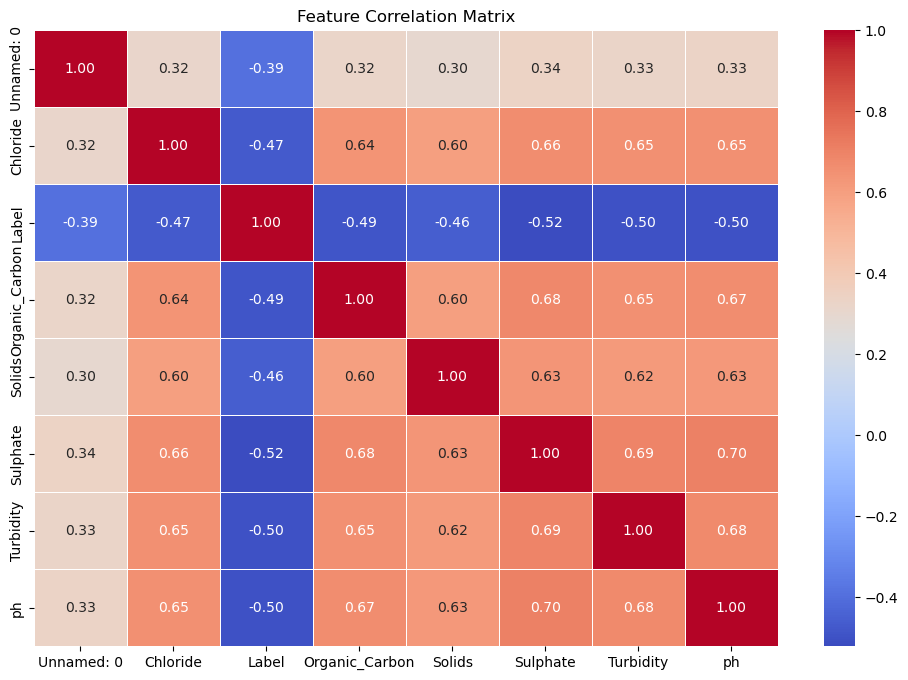

In [146]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Remove Highly Correlated Features (Threshold > 0.9)

In [148]:
# Identify highly correlated features
correlated_features = set()
threshold = 0.9

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])

# Drop correlated features
df.drop(columns=correlated_features, inplace=True)

print("\nRemaining Features after Correlation Removal:", df.columns)



Remaining Features after Correlation Removal: Index(['Unnamed: 0', 'Chloride', 'Label', 'Organic_Carbon', 'Solids',
       'Sulphate', 'Turbidity', 'ph'],
      dtype='object')


### HISTOGRAM PLOT

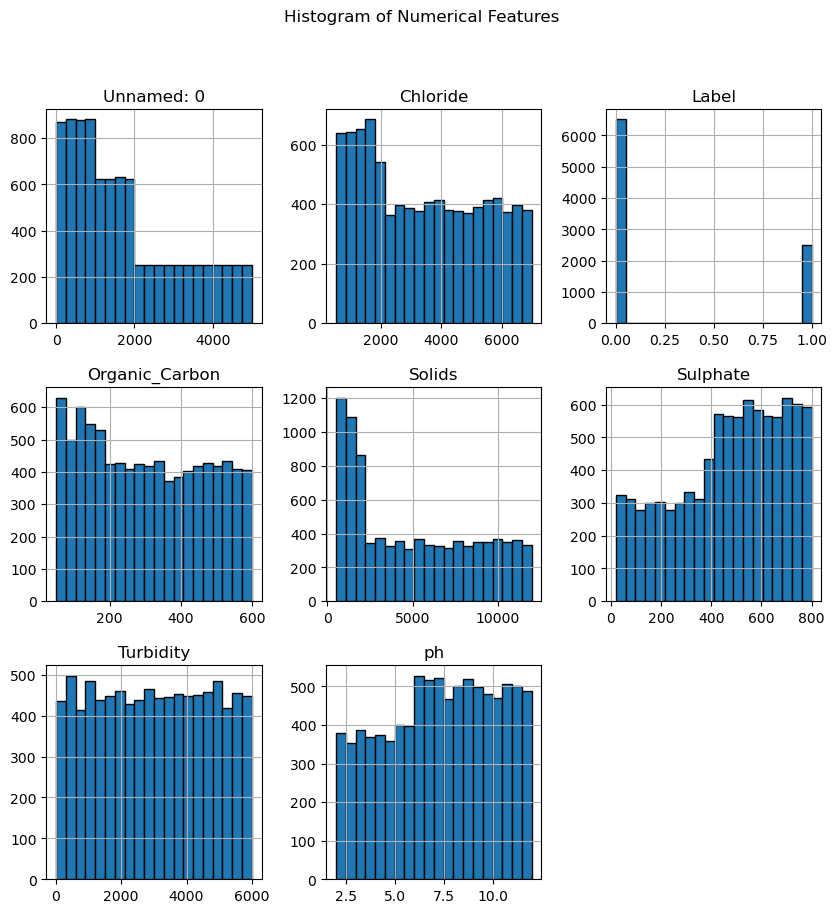

In [150]:
df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.show()

### OUTLIER DETECTION

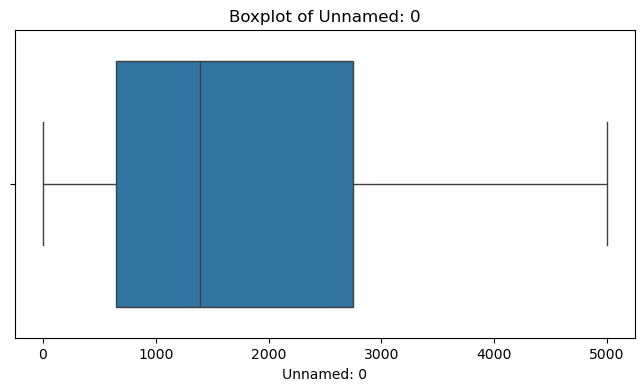

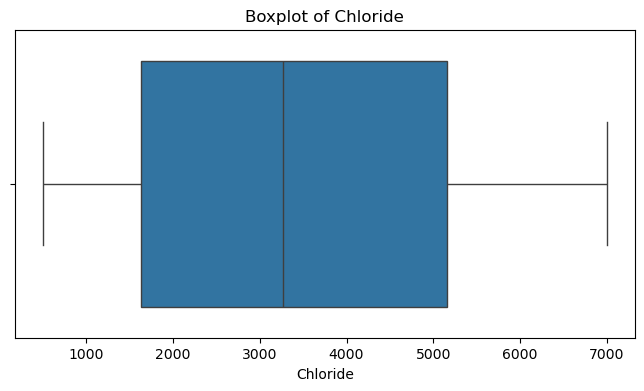

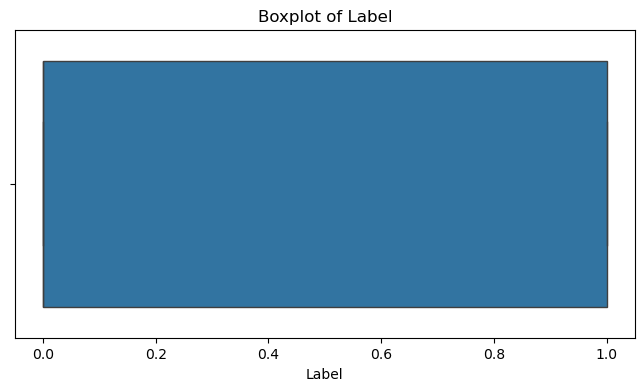

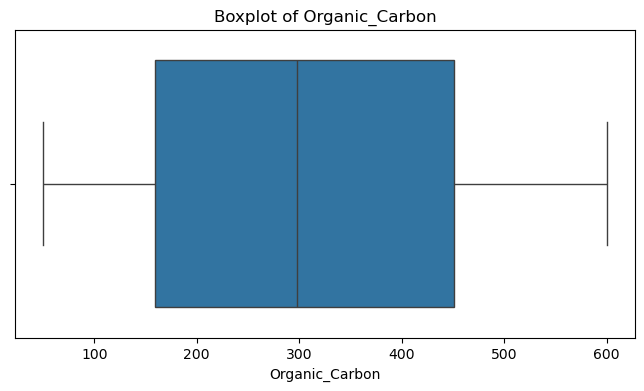

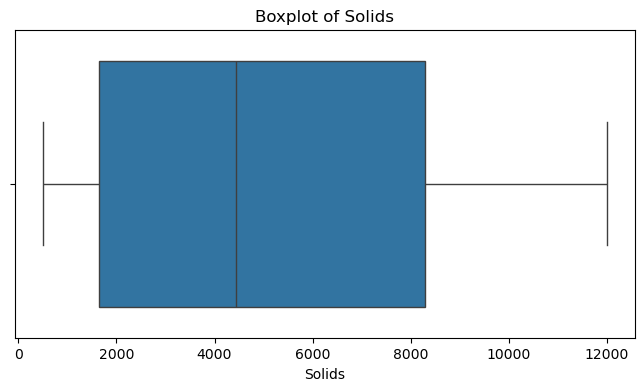

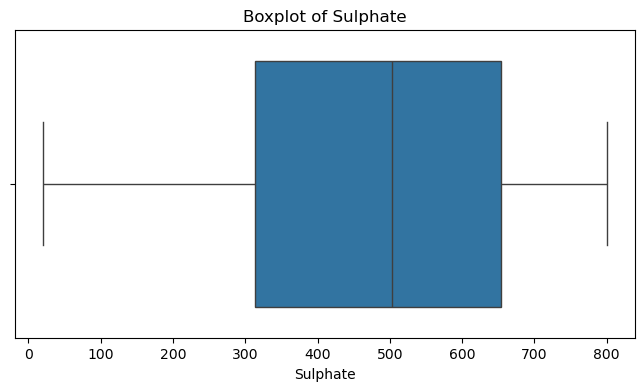

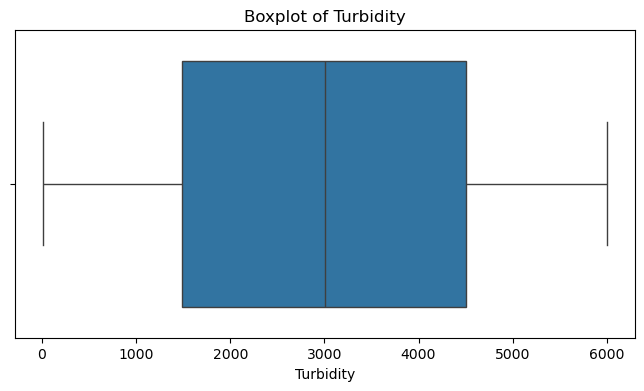

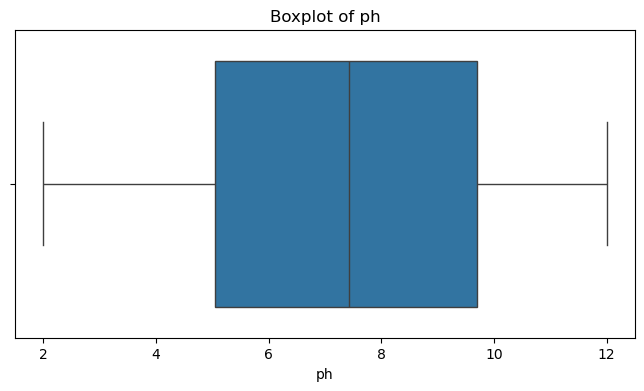

In [152]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Handle outliers using the IQR (Interquartile Range) method, which is a common way to remove extreme values. The steps are:

Calculate Q1 (25th percentile) and Q3 (75th percentile).

Compute the IQR (Q3 - Q1).

Define lower and upper bounds using the formula:

Lower Bound=Q1−1.5×IQR

Upper Bound=Q3+1.5×IQR
Filter out values outside these bounds.]

### OUTLIER HANDLING IQR METHOD

In [155]:
# Handling outliers using IQR method
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outlier removal
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df)

# Print the shape before and after outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")


Original dataset shape: (9016, 8)
Dataset shape after outlier removal: (9016, 8)



Outlier Analysis for Unnamed: 0
count    9016.000000
mean     1775.619122
std      1396.070665
min         0.000000
25%       643.750000
50%      1396.500000
75%      2745.250000
max      4999.000000
Name: Unnamed: 0, dtype: float64


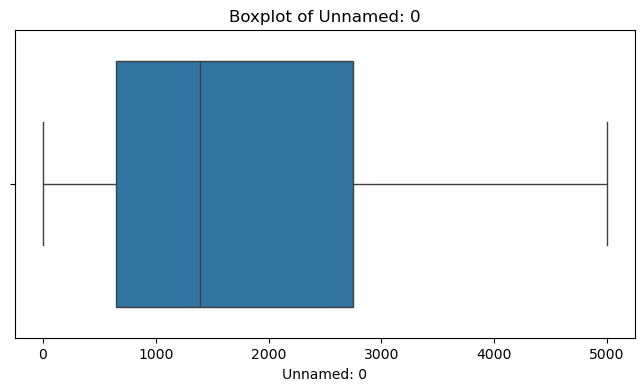

Number of Outliers in Unnamed: 0: 0
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Outlier Analysis for Chloride
count    9016.000000
mean     3421.187168
std      1950.077021
min       500.007896
25%      1624.674702
50%      3265.962165
75%      5162.266524
max      6999.595374
Name: Chloride, dtype: float64


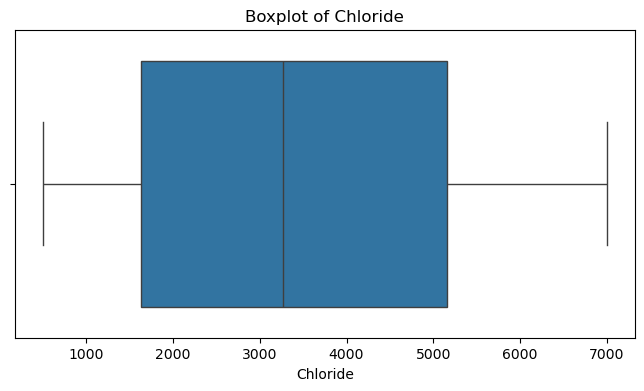

Number of Outliers in Chloride: 0
Empty DataFrame
Columns: [Chloride]
Index: []

Outlier Analysis for Label
count    9016.000000
mean        0.277950
std         0.448014
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Label, dtype: float64


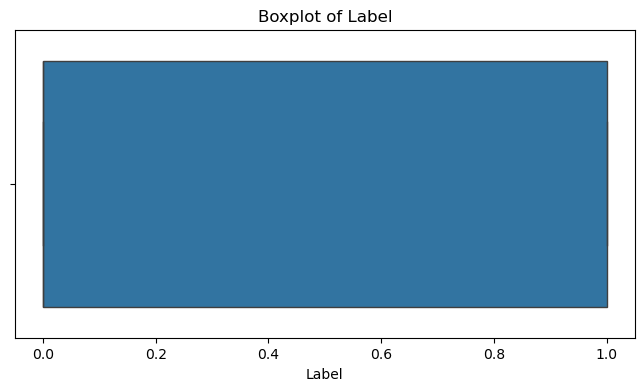

Number of Outliers in Label: 0
Empty DataFrame
Columns: [Label]
Index: []

Outlier Analysis for Organic_Carbon
count    9016.000000
mean      307.186382
std       163.204894
min        50.002808
25%       159.011362
50%       298.147445
75%       451.416498
max       599.906575
Name: Organic_Carbon, dtype: float64


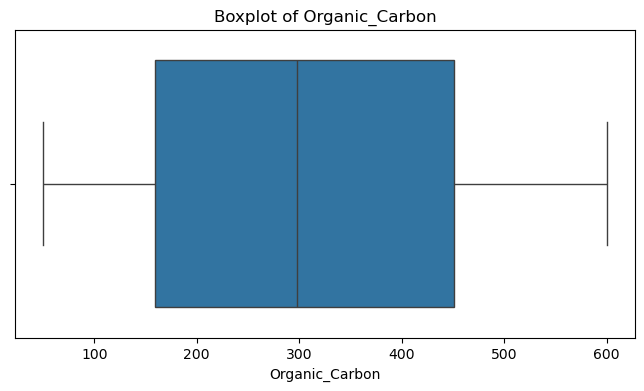

Number of Outliers in Organic_Carbon: 0
Empty DataFrame
Columns: [Organic_Carbon]
Index: []

Outlier Analysis for Solids
count     9016.000000
mean      5082.233751
std       3616.611311
min        502.309068
25%       1634.944034
50%       4436.781235
75%       8300.703596
max      11999.407530
Name: Solids, dtype: float64


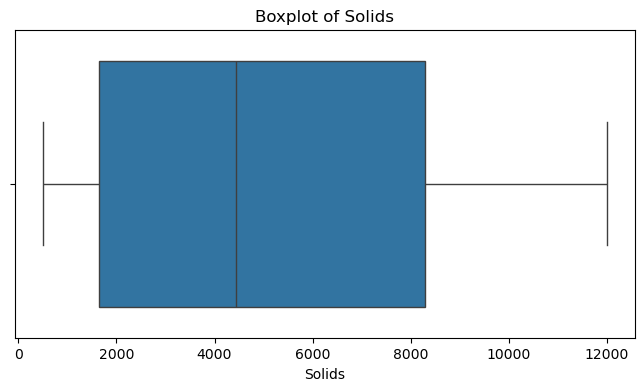

Number of Outliers in Solids: 0
Empty DataFrame
Columns: [Solids]
Index: []

Outlier Analysis for Sulphate
count    9016.000000
mean      471.725986
std       216.059279
min        20.260550
25%       313.160016
50%       502.671213
75%       653.435843
max       799.961446
Name: Sulphate, dtype: float64


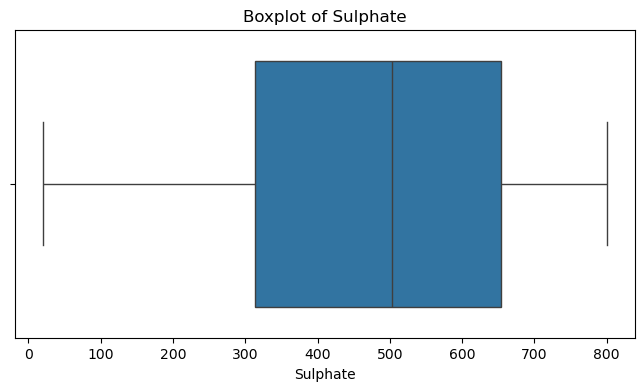

Number of Outliers in Sulphate: 0
Empty DataFrame
Columns: [Sulphate]
Index: []

Outlier Analysis for Turbidity
count    9016.000000
mean     3001.335959
std      1732.544823
min        11.057664
25%      1486.675165
50%      3002.223462
75%      4508.731819
max      5999.019634
Name: Turbidity, dtype: float64


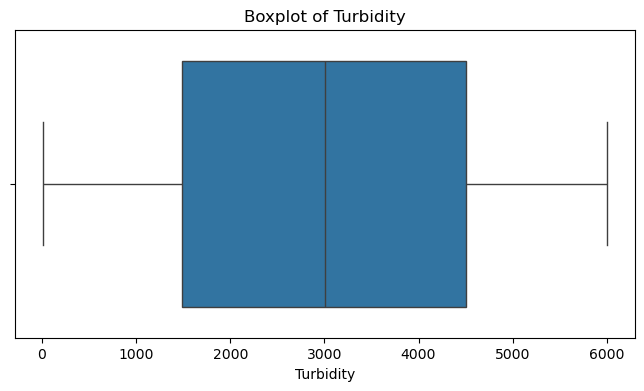

Number of Outliers in Turbidity: 0
Empty DataFrame
Columns: [Turbidity]
Index: []

Outlier Analysis for ph
count    9016.000000
mean        7.316166
std         2.813105
min         2.000041
25%         5.050985
50%         7.430091
75%         9.690529
max        11.999440
Name: ph, dtype: float64


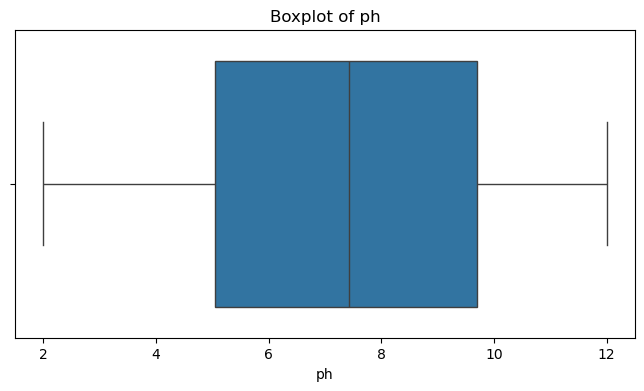

Number of Outliers in ph: 0
Empty DataFrame
Columns: [ph]
Index: []


In [156]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nOutlier Analysis for {column}")
    
    # 1. Display Summary Statistics
    print(df[column].describe())

    # 2. Boxplot Visualization for Outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

    # 3. IQR Method for Outlier Detection
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of Outliers in {column}: {outliers.shape[0]}")
    print(outliers[[column]].head())  # Display first few outliers

### SPLIT TRAIN AND TEST DATA

In [158]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Label"])  # Change "Label" to the actual target column name
y = df["Label"]

# Split dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### NORMALISE FEATURES

In [160]:
# Standardize feature values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


###  Initialize Machine Learning Models

In [162]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(),
    
}


In [163]:
# Train and Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Display Results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")



Model: Logistic Regression
Accuracy: 0.8043
Precision: 0.6085
Recall: 0.8283
F1 Score: 0.7016
Confusion Matrix:
[[1036  267]
 [  86  415]]

Model: Random Forest
Accuracy: 0.7140
Precision: 0.4824
Recall: 0.4112
F1 Score: 0.4440
Confusion Matrix:
[[1082  221]
 [ 295  206]]

Model: SVM
Accuracy: 0.8182
Precision: 0.6358
Recall: 0.8084
F1 Score: 0.7118
Confusion Matrix:
[[1071  232]
 [  96  405]]

Model: KNN
Accuracy: 0.7633
Precision: 0.5673
Recall: 0.6228
F1 Score: 0.5937
Confusion Matrix:
[[1065  238]
 [ 189  312]]


### BEST MODEL 

🔹 MLP Model Accuracy (Backpropagation): 0.82


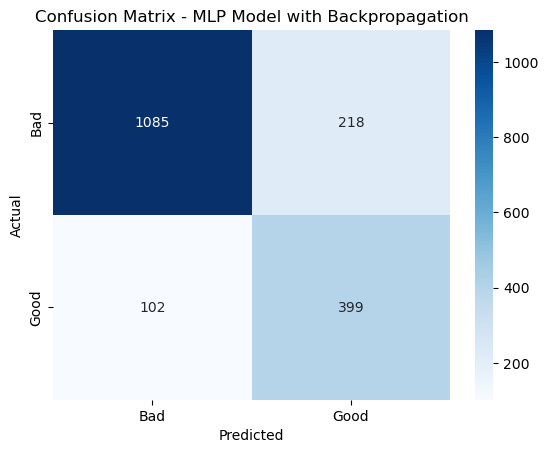


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1303
           1       0.65      0.80      0.71       501

    accuracy                           0.82      1804
   macro avg       0.78      0.81      0.79      1804
weighted avg       0.84      0.82      0.83      1804

Fitting 3 folds for each of 96 candidates, totalling 288 fits
✅ Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'sgd'}
🎯 Final Tuned Model Accuracy: 0.82


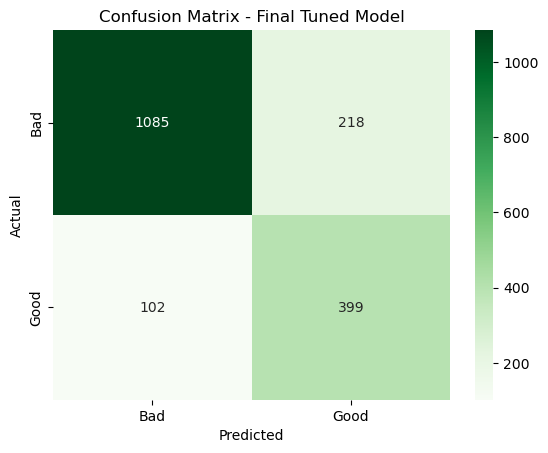


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1303
           1       0.65      0.80      0.71       501

    accuracy                           0.82      1804
   macro avg       0.78      0.81      0.79      1804
weighted avg       0.84      0.82      0.83      1804



In [165]:
# Feature Selection (Using important columns)
selected_features = ['Chloride', 'Organic_Carbon', 'Solids', 'Sulphate', 'Turbidity', 'ph']
target = 'Label'   # Assuming this column contains 0 (Bad) and 1 (Good)

# Splitting data into features and target
X = df[selected_features]
y = df[target]

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing Features (MLP requires scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------------
# 🔹 MLP Model with Backpropagation & Optimization
# -----------------------------------------------------
mlp_bp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # More neurons for better learning
    activation='tanh',                 # Try 'relu' or 'tanh'
    solver='sgd',                      # Using Stochastic Gradient Descent
    momentum=0.9,                      # Helps in optimization
    alpha=0.001,                        # L2 Regularization to prevent overfitting
    learning_rate_init=0.001,           # Proper learning rate
    max_iter=3000,                      # More iterations for better training
    early_stopping=True,                # Stops when no improvement
    random_state=42
)

# Train the model
mlp_bp.fit(X_train, y_train)

# Predictions
y_pred_bp = mlp_bp.predict(X_test)

# Evaluate the Model
accuracy_bp = accuracy_score(y_test, y_pred_bp)
print(f"🔹 MLP Model Accuracy (Backpropagation): {accuracy_bp:.2f}")

# Confusion Matrix
cm_bp = confusion_matrix(y_test, y_pred_bp)
sns.heatmap(cm_bp, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Model with Backpropagation")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_bp))

# -----------------------------------------------------
# 🔹 Hyperparameter Tuning using GridSearchCV
# -----------------------------------------------------
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32), (32, 16), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform Grid Search
grid_search = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
print("✅ Best Parameters:", grid_search.best_params_)

# Train Final Model with Best Parameters
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)

# Final Model Evaluation
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"🎯 Final Tuned Model Accuracy: {accuracy_best:.2f}")

# Confusion Matrix for Final Model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Tuned Model")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_best))

## Evaluation metrics

🔹 Accuracy: 0.8226
🔹 Precision: 0.6467
🔹 Recall (Sensitivity): 0.7964
🔹 Specificity: 0.8327
🔹 F1-Score: 0.7138

🔹 Classification Report:
               precision    recall  f1-score   support

         Bad       0.91      0.83      0.87      1303
        Good       0.65      0.80      0.71       501

    accuracy                           0.82      1804
   macro avg       0.78      0.81      0.79      1804
weighted avg       0.84      0.82      0.83      1804


🔹 Confusion Matrix:
[[1085  218]
 [ 102  399]]


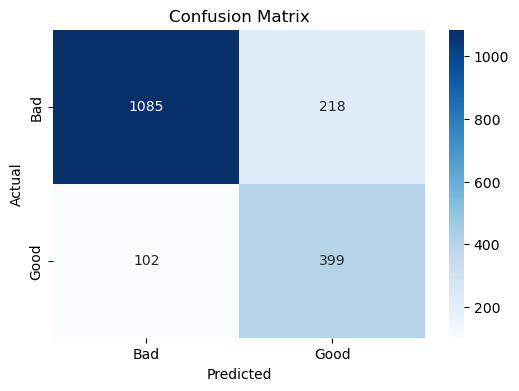

In [167]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)  # Sensitivity
f1 = f1_score(y_test, y_pred_best)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Sensitivity (Recall) & Specificity Calculation
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives
TN = conf_matrix[0, 0]  # True Negatives

sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)  # True Negative Rate

# Display results
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall (Sensitivity): {recall:.4f}")
print(f"🔹 Specificity: {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

# Print Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_best, target_names=["Bad", "Good"]))

# Display Confusion Matrix
print("\n🔹 Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Compare models based on accuracy

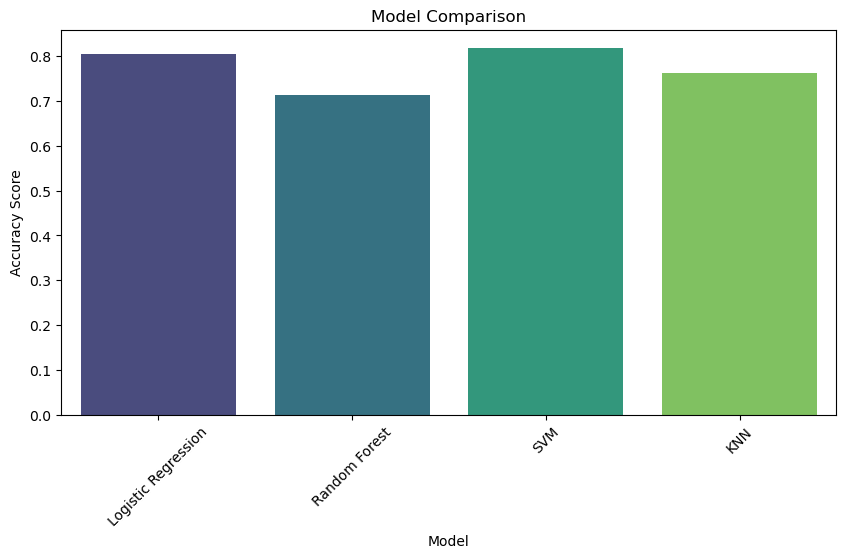

In [169]:

accuracies = [metrics['Accuracy'] for metrics in results.values()]
names = list(results.keys())

plt.figure(figsize=(10, 5))
sns.barplot(x=names, y=accuracies, hue=names, palette='viridis', legend=False)

plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()


### Predict on test data

In [171]:
y_pred_best = best_mlp.predict(X_test)#labele good water as 1 and bad water as 0

# Convert predictions to readable labels
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best}) #creates data frame to compare act vs pred
df_results['Predicted_Label'] = df_results['Predicted'].map({0: 'Bad', 1: 'Good'}) #maps words with 0 and 1

# Display first 10 results
print(df_results.head(10))

      Actual  Predicted Predicted_Label
3353       0          0             Bad
9093       0          1            Good
6415       0          0             Bad
8087       0          1            Good
534        1          1            Good
7964       1          0             Bad
5719       0          0             Bad
9700       0          1            Good
5255       0          0             Bad
4779       0          0             Bad


### MODEL DEPLOYMENT

Good Water (Label = 1)
Chloride: 500 - 6984 mg/L (Mean: 1745)

Organic Carbon: 50 - 598 mg/L (Mean: 164)

Solids: 502 - 11991 mg/L (Mean: 2088)

Sulphate: 20 - 799 mg/L (Mean: 268)

Turbidity: 11 - 5971 NTU (Mean: 1438)

pH: 2.00 - 11.99 (Mean: 4.75)

--------------------------------------------------------------------------------------------------------------------

Bad Water (Label = 0)
Chloride: 500 - 6999 mg/L (Mean: 3994)

Organic Carbon: 50 - 599 mg/L (Mean: 356)

Solids: 502 - 11999 mg/L (Mean: 6110)

Sulphate: 21 - 799 mg/L (Mean: 541)

Turbidity: 16 - 5999 NTU (Mean: 3538)

pH: 2.00 - 11.99 (Mean: 8.19)

In [174]:
def predict_water_quality():
    try:
        # Get input values
        chloride = float(entry_chloride.get())
        organic_carbon = float(entry_organic_carbon.get())
        solids = float(entry_solids.get())
        sulphate = float(entry_sulphate.get())
        turbidity = float(entry_turbidity.get())
        ph = float(entry_ph.get())

        column_names = ["Chloride", "Organic Carbon", "Solids", "Sulphate", "Turbidity", "pH"]
        
        new_sample_df = pd.DataFrame([[chloride, organic_carbon, solids, sulphate, turbidity, ph]], columns=column_names)

        new_sample_scaled = scaler.transform(new_sample_df)

        # Predict using the trained model
        prediction = best_mlp.predict(new_sample_scaled)

        # Display Result
        result = "Good" if prediction[0] == 1 else "Bad"
        messagebox.showinfo("Prediction Result", f"💧 Water Quality is: {result}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values!")

# Create GUI window
root = tk.Tk()
root.title("Water Quality Prediction")
root.geometry("400x350")

# Labels and Entry Fields
tk.Label(root, text="Enter Water Quality Parameters:", font=("Arial", 12, "bold")).pack(pady=10)

# Good Water Quality (Label = 1)-Chloride: 1745 mg/L, Organic Carbon: 164 mg/L, Solids: 2088 mg/L, Sulphate: 268 mg/L, Turbidity: 1438 NTU,pH: 4.75
#
tk.Label(root, text="Chloride:").pack()
entry_chloride = tk.Entry(root)
entry_chloride.pack()

tk.Label(root, text="Organic Carbon:").pack()
entry_organic_carbon = tk.Entry(root)
entry_organic_carbon.pack()

tk.Label(root, text="Solids:").pack()
entry_solids = tk.Entry(root)
entry_solids.pack()

tk.Label(root, text="Sulphate:").pack()
entry_sulphate = tk.Entry(root)
entry_sulphate.pack()

tk.Label(root, text="Turbidity:").pack()
entry_turbidity = tk.Entry(root)
entry_turbidity.pack()

tk.Label(root, text="pH:").pack()
entry_ph = tk.Entry(root)
entry_ph.pack()

# Prediction Button
tk.Button(root, text="Predict Quality", command=predict_water_quality, bg="blue", fg="white", font=("Arial", 12)).pack(pady=10)

# Run the GUI
root.mainloop()